<a href="https://colab.research.google.com/github/pgpanagiotidis/Africa-Economic-Banking-and-Systemic-Crisis/blob/main/Africa_Economic_Banking_Systemic_Crisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Generic imports we will need
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from matplotlib.lines import Line2D    
from matplotlib.pyplot import figure
import matplotlib.patches as mpatches
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

In [ ]:
df = pd.read_csv ('african_crises.csv')

In [ ]:
print(df.columns)

Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')


In [ ]:
#convert categorical variables to numeric
df['banking_crisis']=df['banking_crisis'].replace(['crisis','no_crisis'],[1,0])

In [ ]:
# make time series the dataset
df = df.set_index('year')

Feature: 0, Score: 0.59650
Feature: 1, Score: 0.14800
Feature: 2, Score: 0.01550
Feature: 3, Score: 0.02025
Feature: 4, Score: 0.00387
Feature: 5, Score: 0.16996
Feature: 6, Score: 0.00567
Feature: 7, Score: 0.01452
Feature: 8, Score: 0.02571


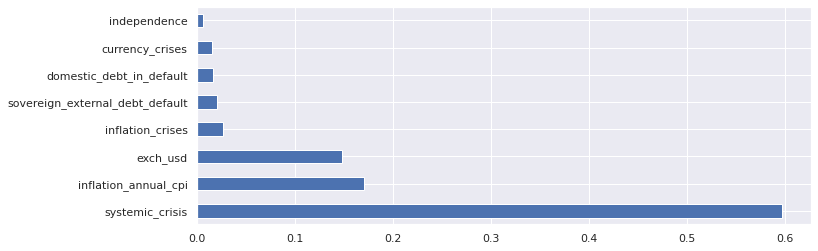

In [ ]:
# random forest for feature importance for banking crisis feature
# define dataset
dfnew=df[['systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis']]
X, y = dfnew[['systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises']],dfnew['banking_crisis']
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(8)
   .plot(kind='barh'))
#systemic_crisis, inflation_annual_cpi and exch_usd are the most crucial feature for the prediction of the banking crisis

In [ ]:
# inflation_annual_cpi, The exchange rate of the country vis-a-vis the USD and the systemic crisis for every country
def Countryplot(data):
  for i in data['country'].unique():
    dfcountry=data[data['country']==i]
    fig, axes = plt.subplots(nrows=1,ncols=4,figsize=(16,1))
    dfcountry['inflation_annual_cpi'].plot(ax=axes[0])
    axes[0].title.set_text('Inflation annual CPI')
    dfcountry['exch_usd'].plot(ax=axes[1])
    axes[1].title.set_text('The exchange rate vis-a-vis the USD')
    dfcountry['systemic_crisis'].plot(ax=axes[2])
    axes[2].title.set_text('Systemic crisis')
    dfcountry['banking_crisis'].plot(ax=axes[3])
    axes[3].title.set_text('Banking crisis')
    plt.figtext(0.5, 1.3, i, ha='center', va='center')
    plt.show()

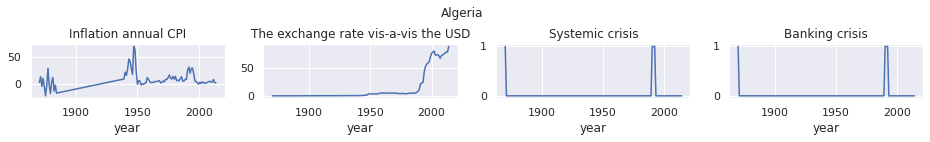

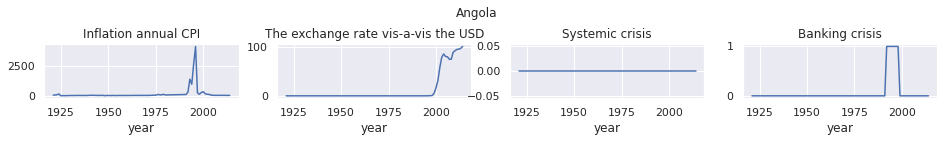

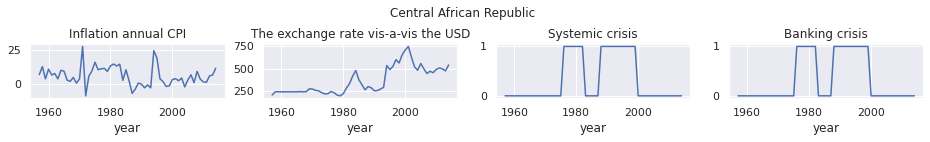

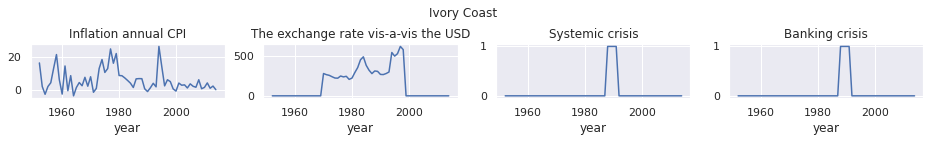

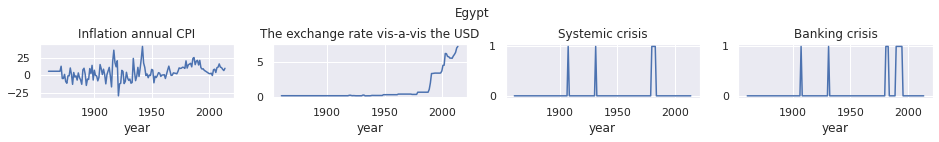

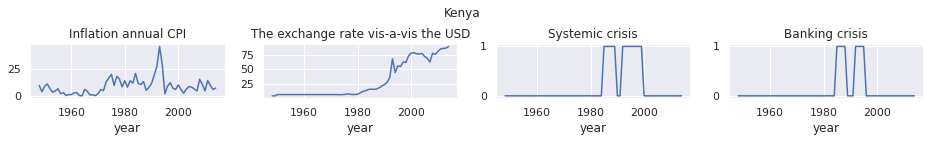

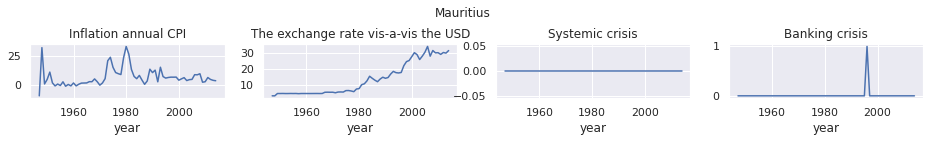

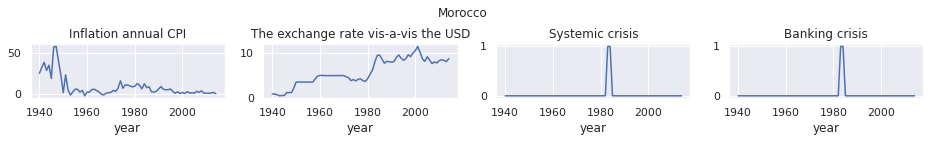

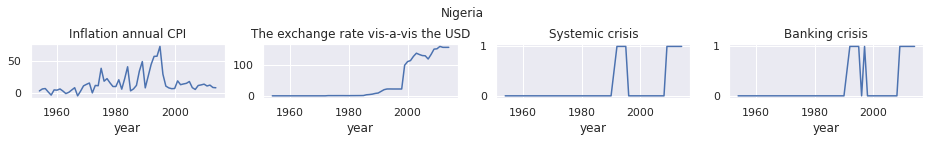

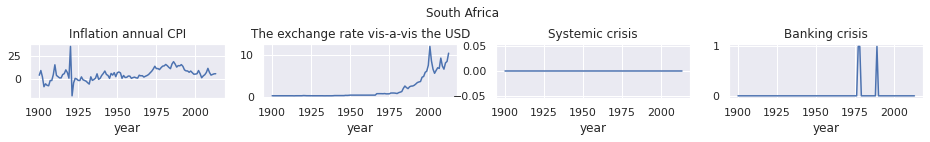

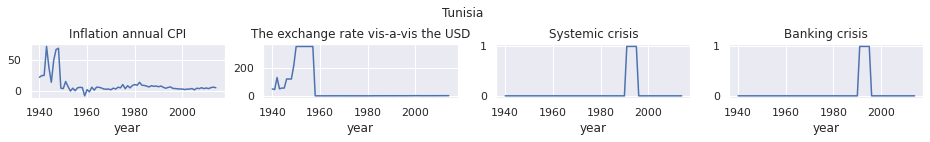

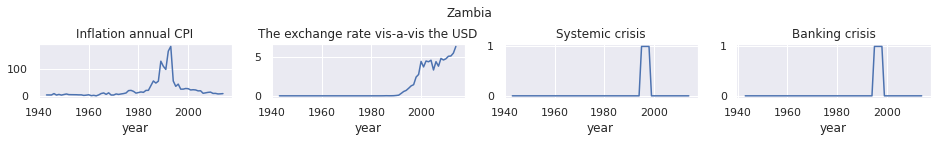

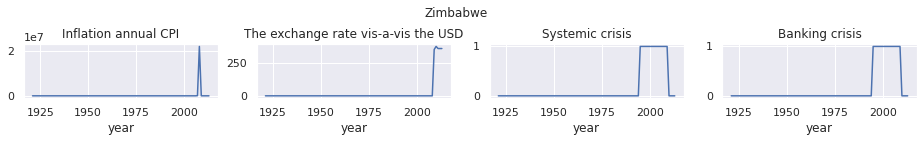

In [ ]:
#Inflation annual CPI, The exchange rate vis-a-vis the USD and the systemic crisis of each country
Countryplot(df)